In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
import pandas_profiling as pdp
pdp.ProfileReport(df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

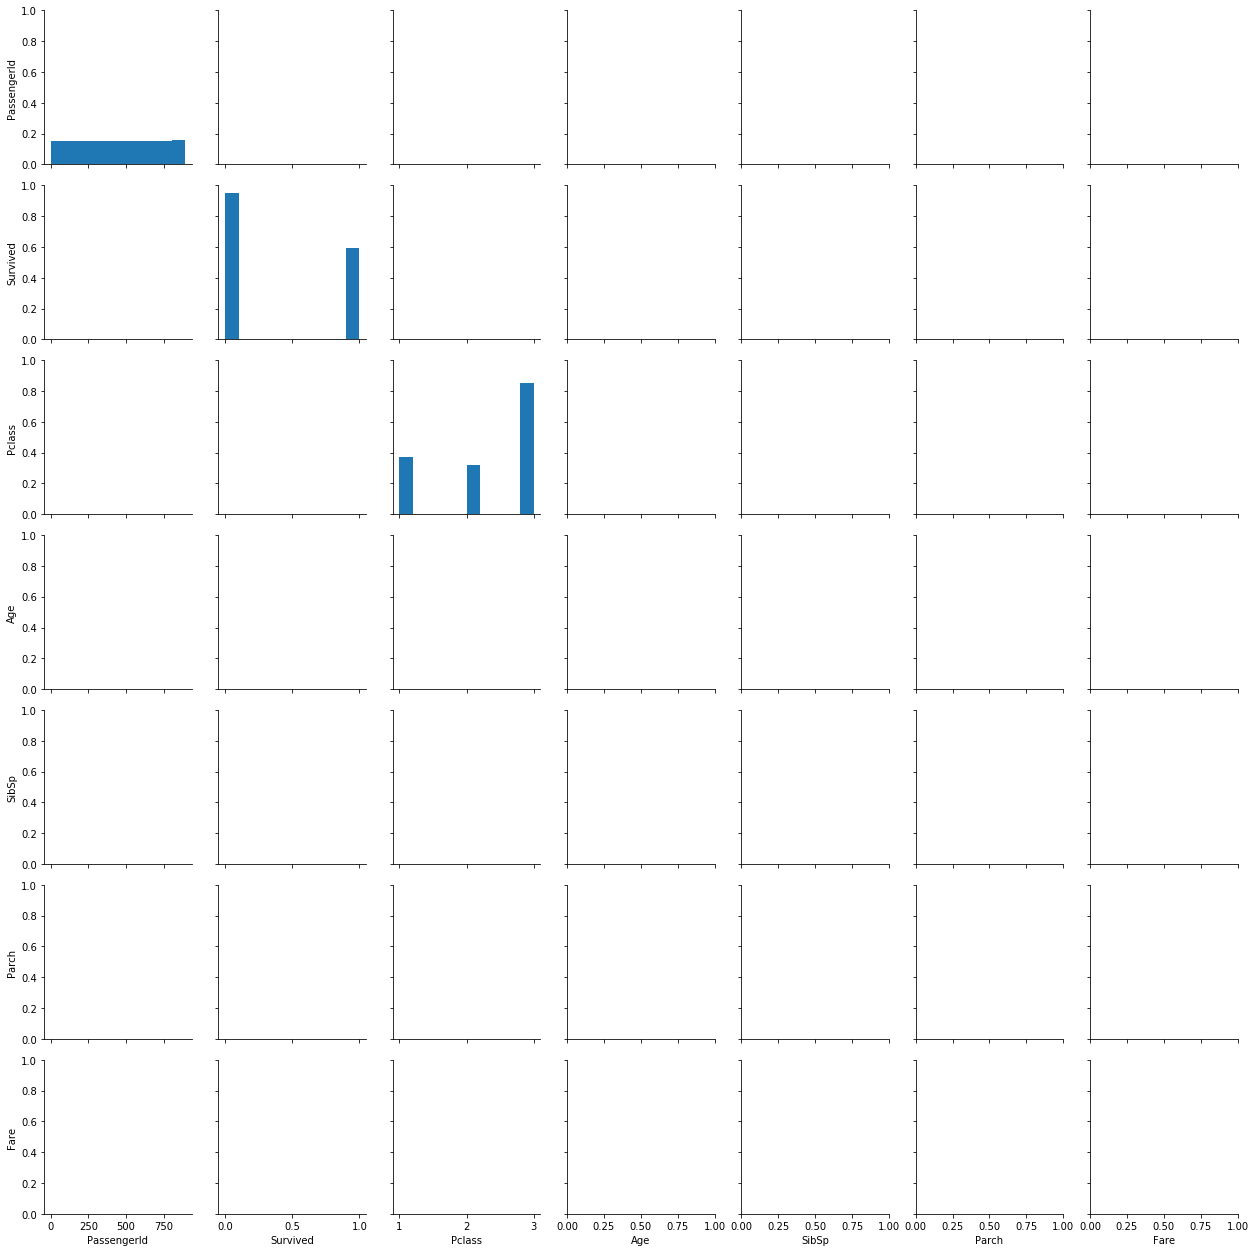

In [4]:
sns.pairplot(df)

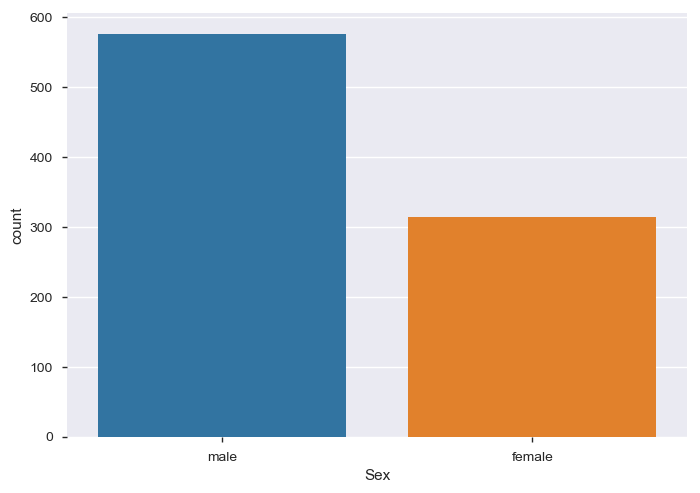

In [19]:
sns.countplot("Sex", data=df)

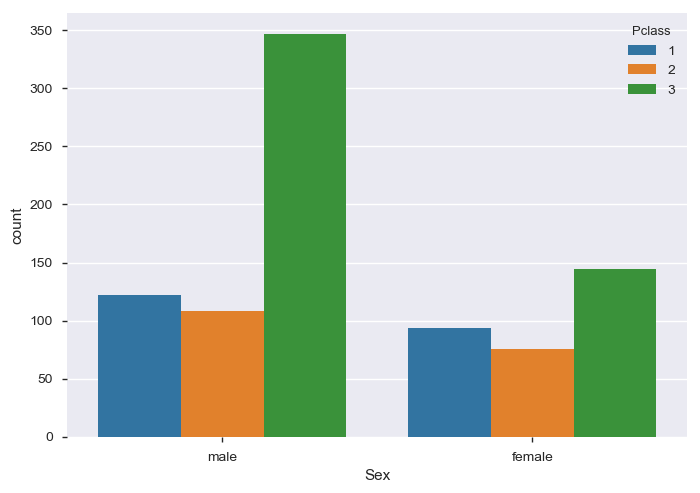

In [25]:
sns.countplot("Sex", data=df, hue="Pclass") #3rdクラスには男性が多いのがわかる

In [22]:
# 「child」という新しい特徴量をつくる
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex
    
df["person"] = df[["Age","Sex"]].apply(male_female_child, axis=1)

In [24]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


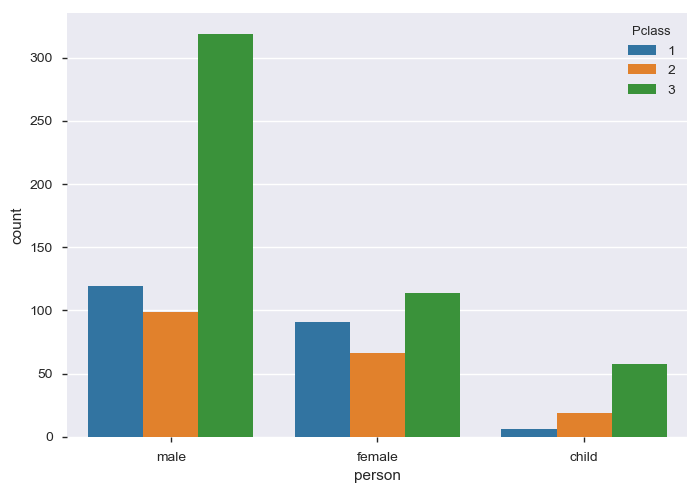

In [26]:
sns.countplot("person", data=df, hue="Pclass") #3rdクラスには男性が多いのがわかる

In [28]:
df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

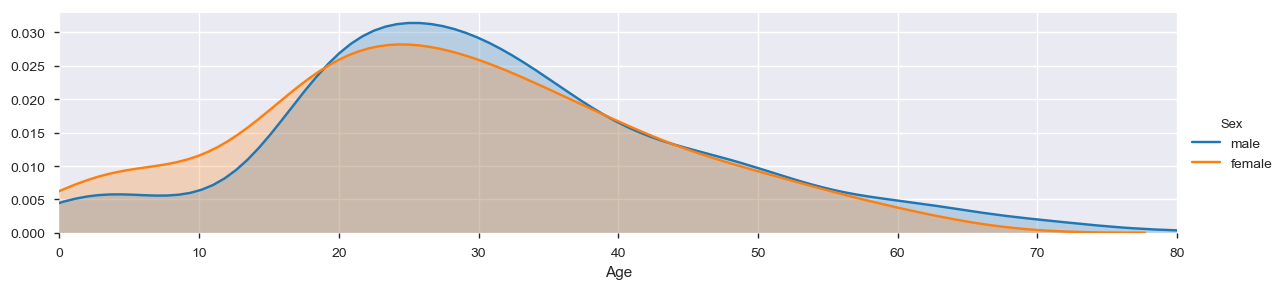

In [30]:
# いくつかのプロットを同時に見ることができる
fig = sns.FacetGrid(df, hue="Sex", aspect=4)#aspectはグラフの長さ
fig.map(sns.kdeplot, "Age", shade=True)#年齢について比較
oldest = df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

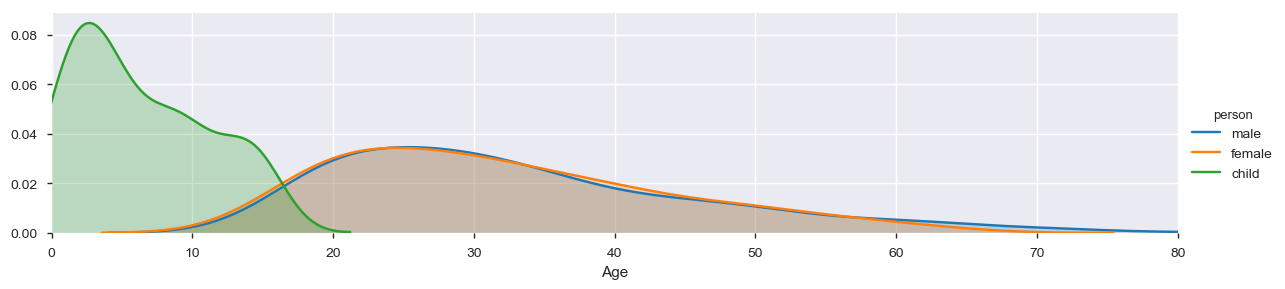

In [31]:
fig = sns.FacetGrid(df, hue="person", aspect=4)#aspectはグラフの長さ
fig.map(sns.kdeplot, "Age", shade=True)#年齢について比較
oldest = df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

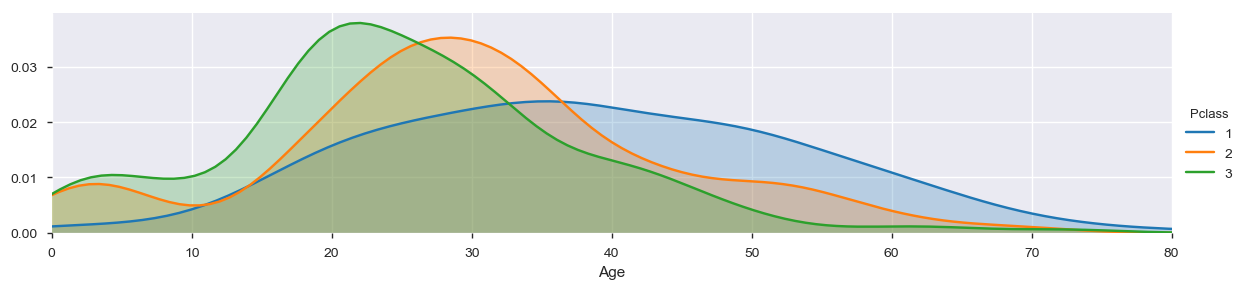

In [32]:
fig = sns.FacetGrid(df, hue="Pclass", aspect=4)#aspectはグラフの長さ
fig.map(sns.kdeplot, "Age", shade=True)#年齢について比較
oldest = df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [33]:
# 乗っていた場所を分析

In [34]:
deck = df["Cabin"].dropna()

In [37]:
#高さだけを抽出（A,B,C,・・・・）
levels = []
for level in deck:
    levels.append(level[0])

levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

In [40]:
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]

cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


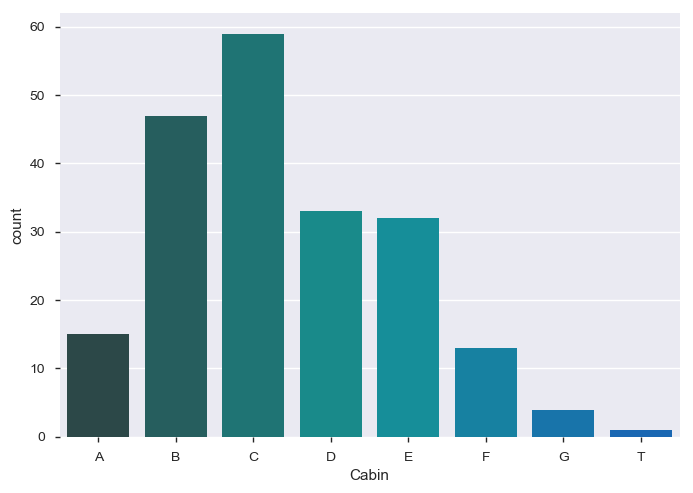

In [42]:
sns.countplot("Cabin", data=cabin_df, palette="winter_d", order=sorted(set(levels)))
#[T]が外れ値であることがわかる

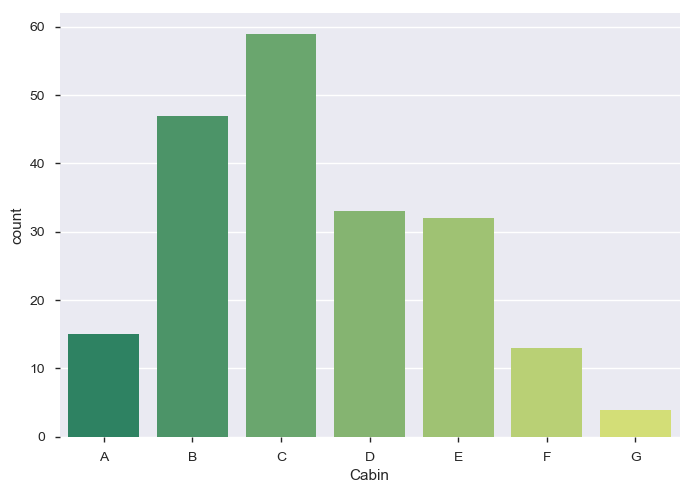

In [47]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]
sns.countplot("Cabin", data=cabin_df, palette="summer", order=sorted(set(cabin_df.Cabin)))

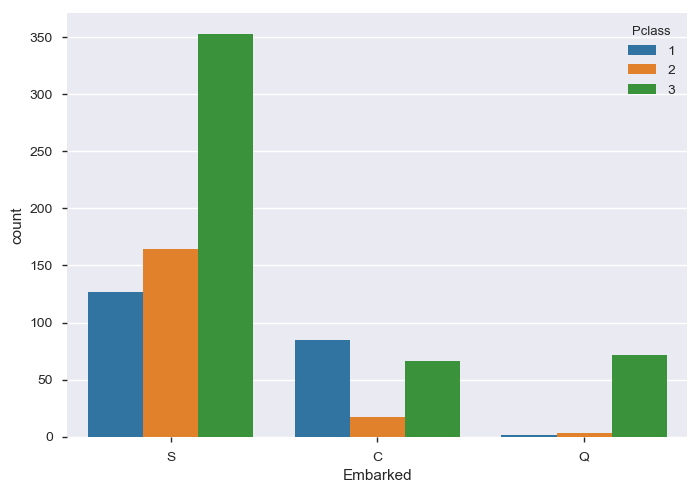

In [49]:
#乗った港と客室の関係を調べる
sns.countplot("Embarked", data=df, hue="Pclass")

In [51]:
#家族づれであったか1人であったかを分析

In [55]:
df["IsAlone"] = df.Parch + df.SibSp

df["IsAlone"].loc[df["IsAlone"] > 0] = "With Family"
df["IsAlone"].loc[df["IsAlone"] == 0] = "Alone"
df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


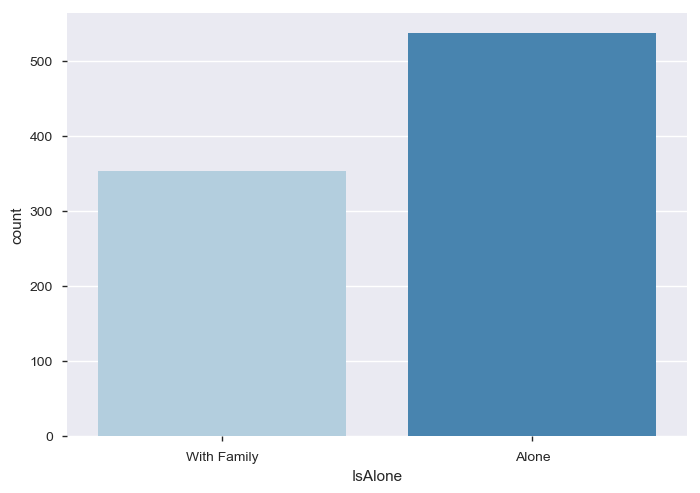

In [58]:
sns.countplot("IsAlone", data=df, palette="Blues")

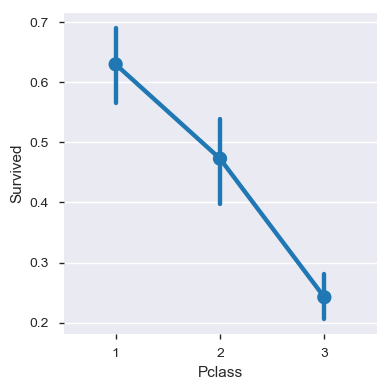

In [63]:
sns.factorplot("Pclass", "Survived", data=df, order=[1,2,3])

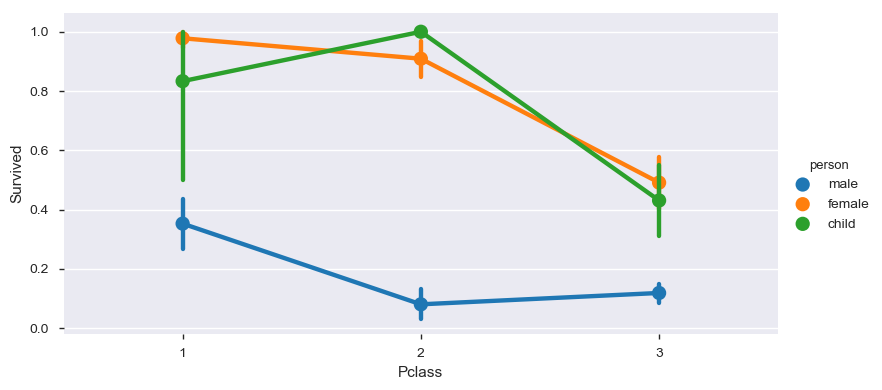

In [65]:
sns.factorplot("Pclass", "Survived", hue="person", data=df, order=[1,2,3] ,aspect=2)
#女性と子供は1stクラス、2ndクラスあまり関係がない。男性は1stとそれ以外で大きく違う。

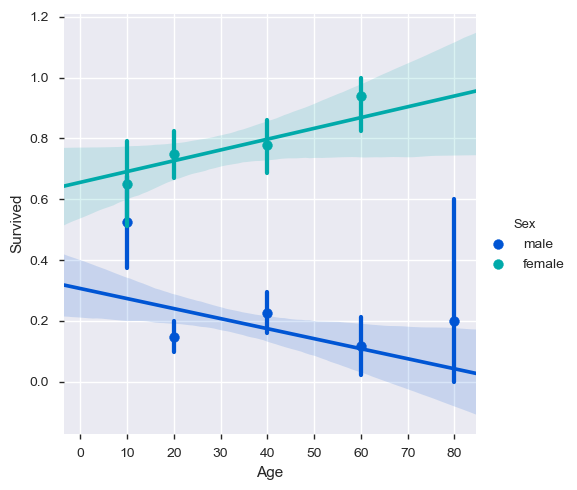

In [67]:
generations=[10,20,40,60,80]
sns.lmplot("Age", "Survived", hue="Sex", data=df, palette="winter",
          x_bins=generations)

#女性は年齢が上がるごとに生存率が上がったが男性は逆（ただし、80代の分散が大きい！！）

hueはgroupby的に使える。便利